In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

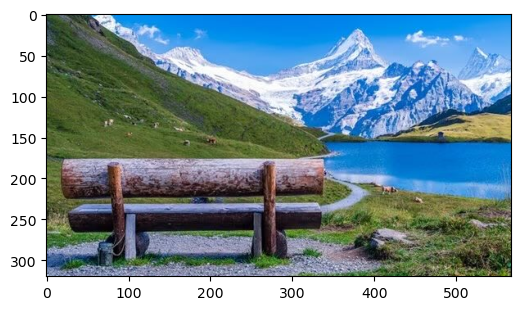

In [10]:

# Load the image
image = cv2.imread("landscape.jpg")

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(6,8))
plt.imshow(image)

In [11]:
pixel_vals = image.reshape((-1,3))

pixel_vals = np.float32(pixel_vals)
pixel_vals

array([[ 60.,  84.,  62.],
       [ 64.,  88.,  64.],
       [ 65.,  91.,  66.],
       ...,
       [138., 153.,  94.],
       [108., 117.,  70.],
       [ 72.,  79.,  37.]], dtype=float32)

In [ ]:
# Sum of squared distances of samples to their closest cluster center
distortions = []

# Range of k's
K = range(2,10,1)

# Loop to find the optimal k
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(pixel_vals)
    distortions.append(kmeanModel.inertia_)
    
# Elbow plot
plt.figure(figsize=(5,3))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow method showing the optimal k')

plt.show()

In [12]:
k = 5

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)

retval, labels, centers = cv2.kmeans(pixel_vals,
                                    k,
                                    None,
                                    criteria,
                                    10,
                                    cv2.KMEANS_RANDOM_CENTERS)

print('Cluster labels: ')
print(labels, '\n')

print('Cluster centroids: ')
print(centers)

Cluster labels: 
[[4]
 [2]
 [2]
 ...
 [2]
 [2]
 [4]] 

Cluster centroids: 
[[ 19.053068 132.06723  218.36954 ]
 [133.93651  159.34514  196.3497  ]
 [ 97.06789  107.406586  73.77739 ]
 [203.48515  215.27534  237.60246 ]
 [ 45.35551   54.307747  38.61716 ]]


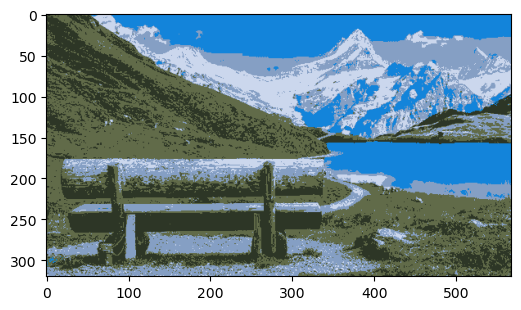

In [13]:
# Convert data into 8-bit values
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]
 
# Reshape data into the original image dimensions
segmented_image = segmented_data.reshape((image.shape))

# Show result
plt.figure(figsize=(6,8))
plt.imshow(segmented_image)